In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [6]:
numericals=[]
categoricals=[]
for col in df.columns:
    if df[col].dtype!='object':
        numericals.append(col)
    else:
        categoricals.append(col)

### Univariate categorical analysis

In [7]:
categoricals

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

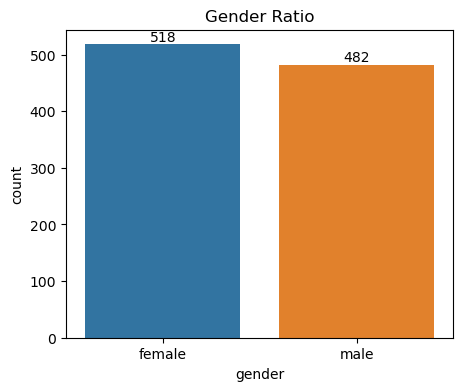

In [8]:
plt.figure(figsize=(5,4))
ax=sns.countplot(data=df,x='gender')
plt.title('Gender Ratio')
for bar in ax.containers:
    ax.bar_label(bar)

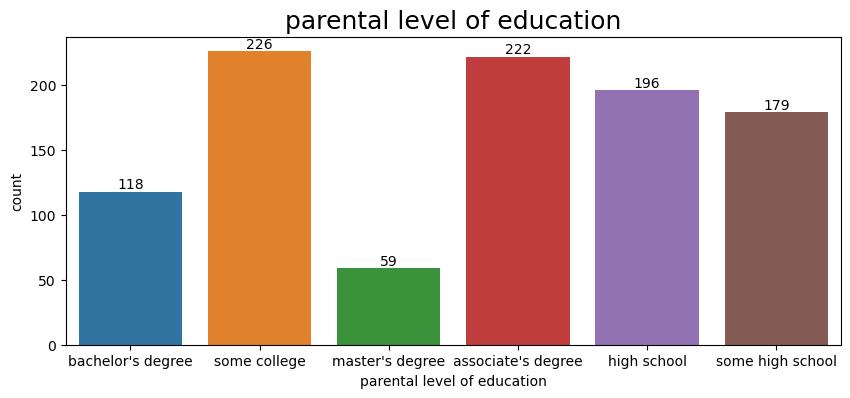

In [9]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=df,x='parental level of education')
plt.title('parental level of education',fontsize=18)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

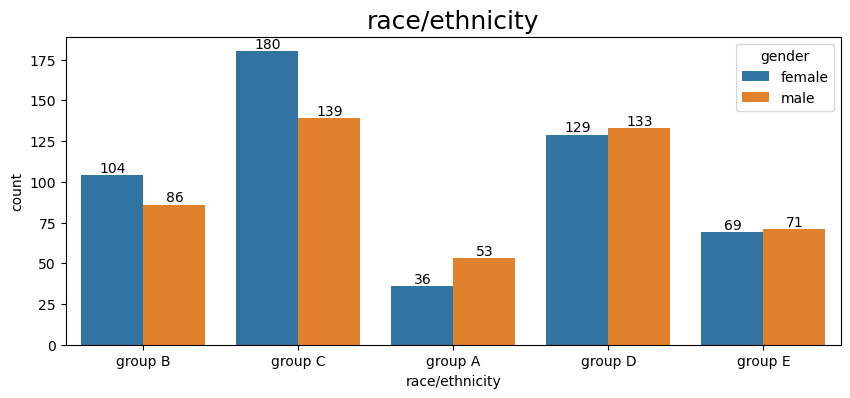

In [10]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=df,x='race/ethnicity',hue='gender')
plt.title('race/ethnicity',fontsize=18)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

### Univariate numerical analysis

In [11]:
numericals

['math score', 'reading score', 'writing score']

<Axes: xlabel='writing score', ylabel='Count'>

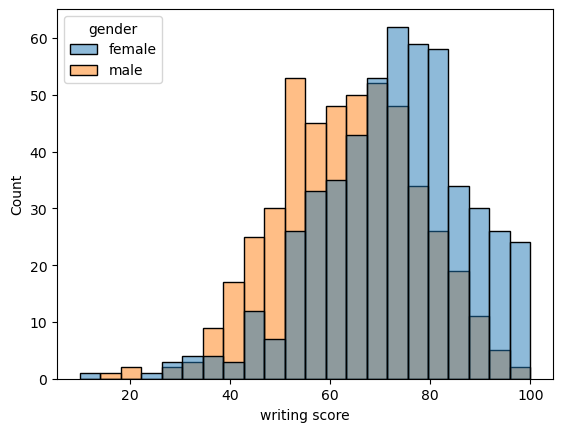

In [12]:
sns.histplot(data=df,x='writing score',hue='gender')

<Axes: xlabel='reading score', ylabel='Count'>

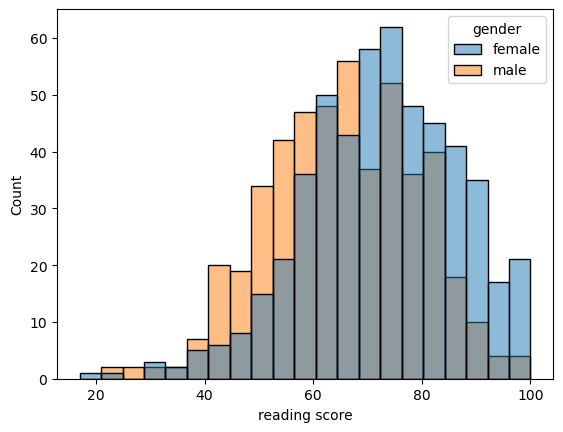

In [13]:
sns.histplot(data=df,x='reading score',hue='gender')

<Axes: xlabel='math score', ylabel='Count'>

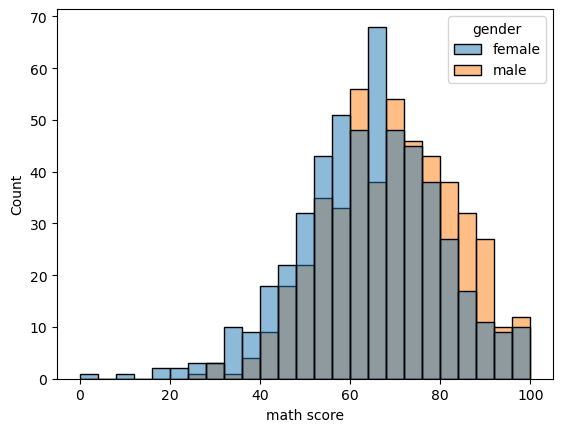

In [14]:
sns.histplot(data=df,x='math score',hue='gender')

### Bivariate categorical analysis

Text(0.5, 1.0, 'math score of student based on parents education level')

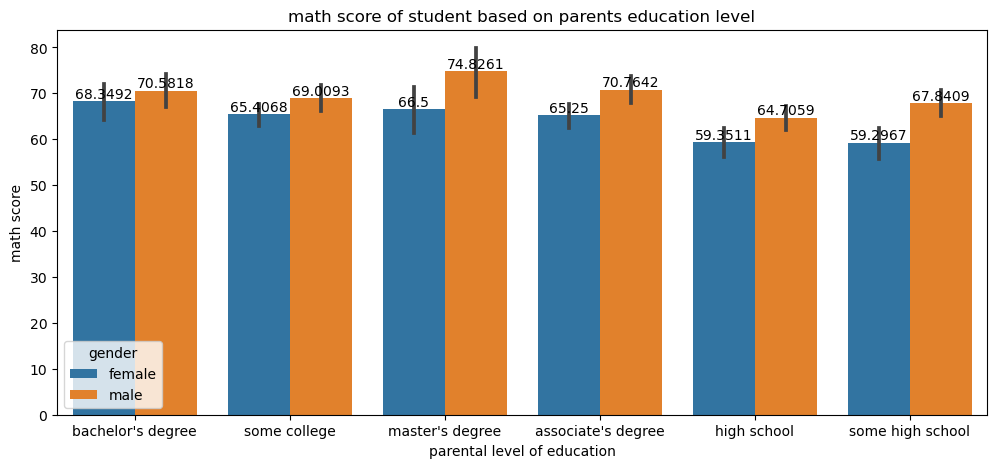

In [15]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,x='parental level of education',y='math score',hue='gender')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('math score of student based on parents education level')    

Text(0.5, 1.0, 'math score of student based on test preparation course')

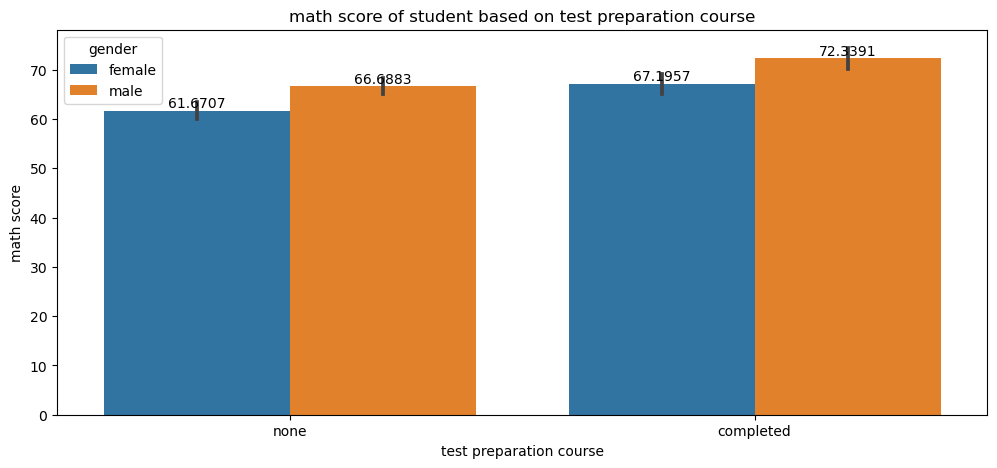

In [16]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,x='test preparation course',y='math score',hue='gender')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('math score of student based on test preparation course')

Text(0.5, 1.0, 'math score of student based on lunch')

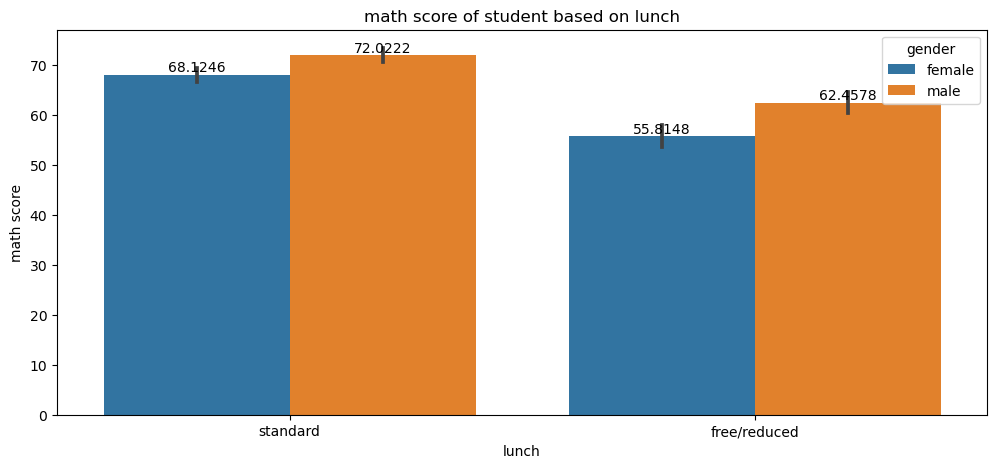

In [17]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,x='lunch',y='math score',hue='gender')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('math score of student based on lunch')

### Bivariate numerical analysis

<Axes: xlabel='math score', ylabel='writing score'>

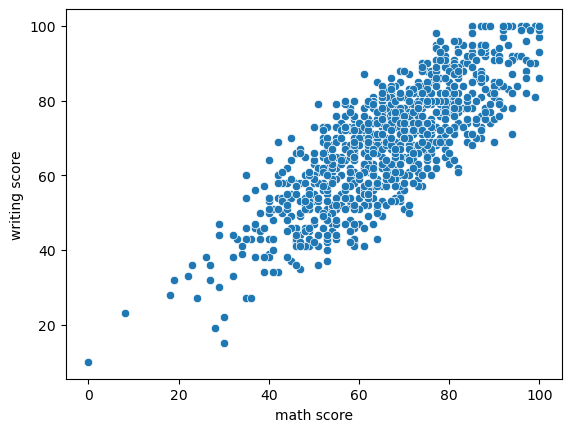

In [18]:
sns.scatterplot(data=df,y='writing score',x='math score')

<Axes: xlabel='math score', ylabel='reading score'>

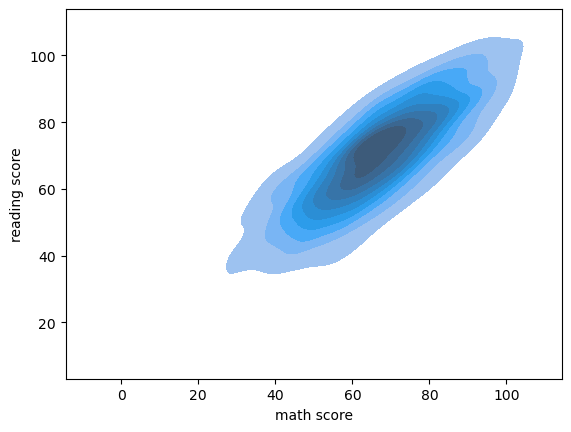

In [19]:
sns.kdeplot(data=df,x='math score',y='reading score',fill=True)

### Pie chart

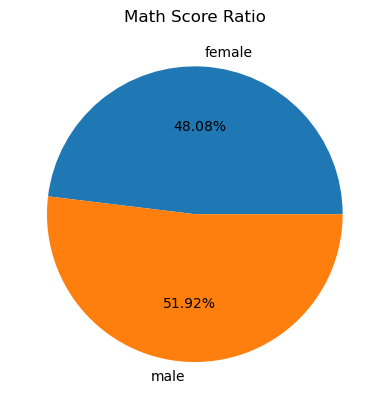

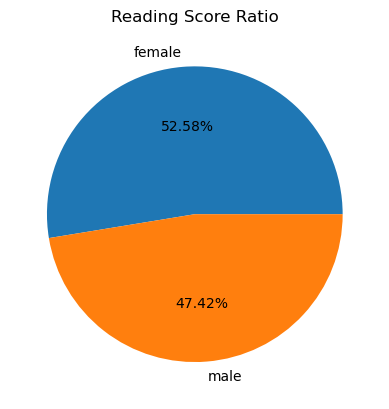

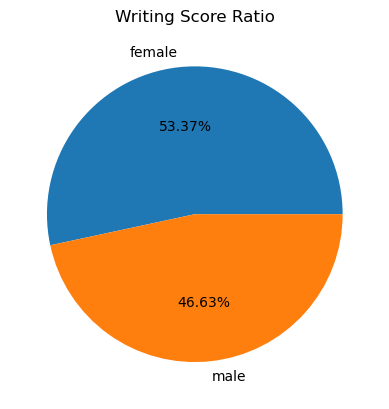

In [20]:
math_score=df.groupby('gender')['math score'].mean()
labels=math_score.reset_index()['gender']
plt.pie(math_score,labels=labels,autopct = "%0.2f%%")
plt.title('Math Score Ratio')
plt.show()
math_score=df.groupby('gender')['reading score'].mean()
labels=math_score.reset_index()['gender']
plt.pie(math_score,labels=labels,autopct = "%0.2f%%")
plt.title('Reading Score Ratio')
plt.show()
math_score=df.groupby('gender')['writing score'].mean()
labels=math_score.reset_index()['gender']
plt.pie(math_score,labels=labels,autopct = "%0.2f%%")
plt.title('Writing Score Ratio')
plt.show()